#### Import Libraries

In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

import category_encoders as ce


%matplotlib inline
import warnings
from joblib import dump, load
warnings.filterwarnings("ignore")

In [46]:
# Load csv file
df = pd.read_csv('insurance.csv')

df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


#### Data Analysis

In [47]:
# display basic information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [48]:
# Display statistics infomation for numerical data
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [49]:
# Display statistics information for categorical data

df.select_dtypes(include=['object']).describe()

,sex,smoker,region
count,1338,1338,1338
unique,2,2,4
top,male,no,southeast
freq,676,1064,364


In [50]:
# check the correlation coefficient between input and output variables
pearson_corr = df.corr(method='pearson')

pearson_corr

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


<AxesSubplot:>

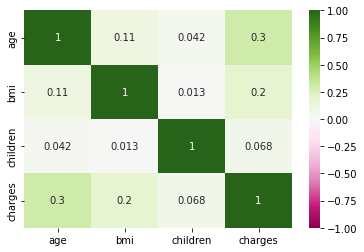

In [51]:
# Visualize the correlation coefficients using heat map.
sns.heatmap(pearson_corr, cmap='PiYG', annot=True, vmin=-1, vmax=1, center=0)

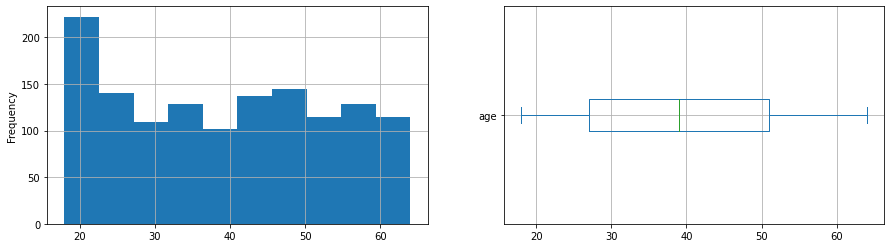

In [52]:
# Plot Ages on histogram and box plot chart
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 4))
df['age'].plot.hist(ax=ax1, grid=True)
df['age'].plot.box(ax=ax2,grid=True,vert=False)
plt.show()

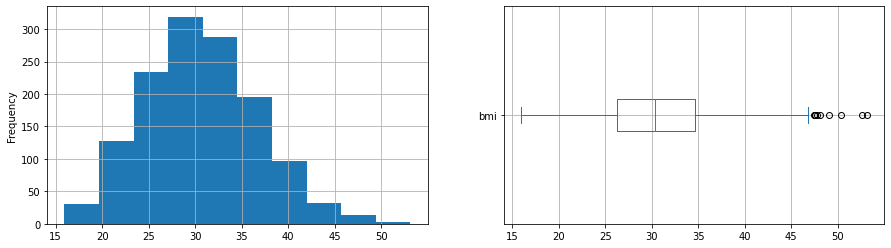

In [53]:
# Plot BMI on histogram and box plot chart
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 4))
df['bmi'].plot.hist(ax=ax1, grid=True)
df['bmi'].plot.box(ax=ax2,grid=True,vert=False)
plt.show()

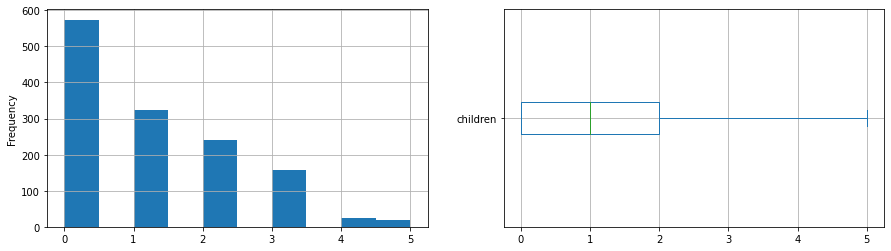

In [54]:
# Plot Children on histogram and box plot chart
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 4))
df['children'].plot.hist(ax=ax1, grid=True)
df['children'].plot.box(ax=ax2,grid=True,vert=False)
plt.show()

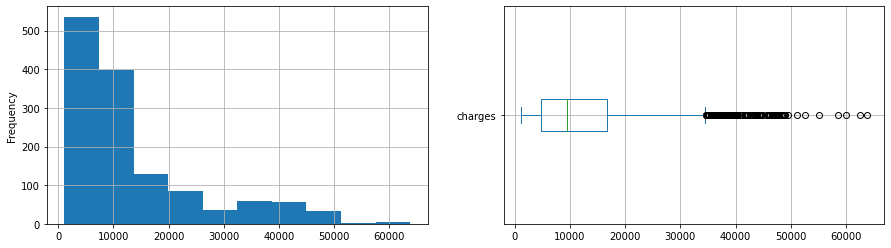

In [55]:
# plot Charges on histogram and box plot chart
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 4))
df['charges'].plot.hist(ax=ax1, grid=True)
df['charges'].plot.box(ax=ax2,grid=True,vert=False)
plt.show()

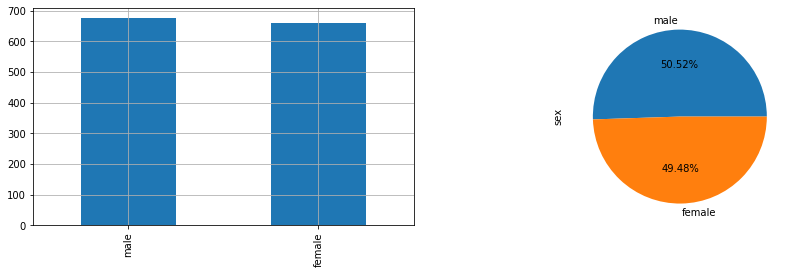

In [56]:
# Plot Sex on bar and pie chart
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 4))
df['sex'].value_counts().plot.bar(ax=ax1, grid=True)
df['sex'].value_counts().plot.pie(ax=ax2,autopct='%.2f%%')
plt.show()

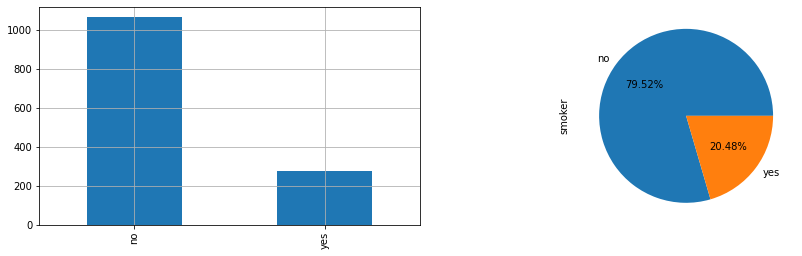

In [57]:
# Plot Smoker on bar and pie chart
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 4))
df['smoker'].value_counts().plot.bar(ax=ax1, grid=True)
df['smoker'].value_counts().plot.pie(ax=ax2,autopct='%.2f%%')
plt.show()

#### Data Preprocessing

In [58]:
# Count number of redundancy records in each class.

df[df.duplicated()].count()

age         1
sex         1
bmi         1
children    1
smoker      1
region      1
charges     1
dtype: int64

In [59]:
# Remove the duplicated records from the dataset.
df.drop_duplicates(inplace=True)

# check agin if there any duplicated value 
df[df.duplicated()].count()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [60]:
# Count number of missing value in each field.
df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [61]:
# Apply One Hot encoding method to categories data ( Sex, Smoker, Region).

df_ = pd.get_dummies(data=df, columns=['sex','smoker'],drop_first=True)
df_ = pd.get_dummies(data=df_, columns=['region'])


# female = 0 male = 1
# smoker = 1 not smoker = 0
# southeast = 0010 southwest = 0001 northwest = 0100 northeast = 1000

df_

,age,bmi,children,charges,sex_male,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,0,1,0,0,0,1
1,18,33.770,1,1725.55230,1,0,0,0,1,0
2,28,33.000,3,4449.46200,1,0,0,0,1,0
3,33,22.705,0,21984.47061,1,0,0,1,0,0
4,32,28.880,0,3866.85520,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,1,0,0,1,0,0
1334,18,31.920,0,2205.98080,0,0,1,0,0,0
1335,18,36.850,0,1629.83350,0,0,0,0,1,0
1336,21,25.800,0,2007.94500,0,0,0,0,0,1


## III. Data Training and Modeling

> Determine the Features & Target Variable

In [62]:
X=df_.drop('charges', axis=1)

y=df_['charges']

> Split the Dataset to Train & Test

In [63]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)


### Train the Model using Linear Regression

> Train the Model using the X_train and y_train

In [64]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

> Coeficient Matrix

In [65]:
weights = lr.coef_
bias = lr.intercept_

print('We obtained the model parameters as follows:')
print('Weights: ', weights)
print('Bias: ', bias)

We obtained the model parameters as follows:
Weights:  [  248.21072022   318.70144095   533.0099888   -101.54205399
 23077.76459287   472.45520552    80.69375073  -366.46441021
  -186.68454604]
Bias:  -11565.107501461822


#### Evaluation

In [66]:
y_test_pred = lr.predict(X_test)
y_train_pred = lr.predict(X_train)

In [67]:
mse = metrics.mean_squared_error(y_test, y_test_pred)
mae = metrics.mean_absolute_error(y_test, y_test_pred)
r2 = metrics.r2_score(y_test, y_test_pred)

print('Mean squared error: ', mse)
print('Mean absolute error: ', mae)
print('R2 score: ', r2)

Mean squared error:  35478020.67523562
Mean absolute error:  4177.045561036322
R2 score:  0.8069287081198011


In [68]:
mse = metrics.mean_squared_error(y_train, y_train_pred)
mae = metrics.mean_absolute_error(y_train, y_train_pred)
r2 = metrics.r2_score(y_train, y_train_pred)

print('Mean squared error: ', mse)
print('Mean absolute error: ', mae)
print('R2 score: ', r2)

Mean squared error:  36979860.90472867
Mean absolute error:  4181.901537775144
R2 score:  0.7299057809339075


In [69]:
# show predicted and real profit
pd.DataFrame(list(zip(y_test_pred, y_test)), columns=['Predicted Charges', 'Real Charges'])

,Predicted Charges,Real Charges
0,8143.693884,8688.85885
1,5737.115683,5708.86700
2,14369.314876,11436.73815
3,31745.513636,38746.35510
4,8962.386657,4463.20510
...,...,...
263,16753.406458,13831.11520
264,15274.565769,13887.20400
265,6454.699355,3925.75820
266,38467.156720,47403.88000


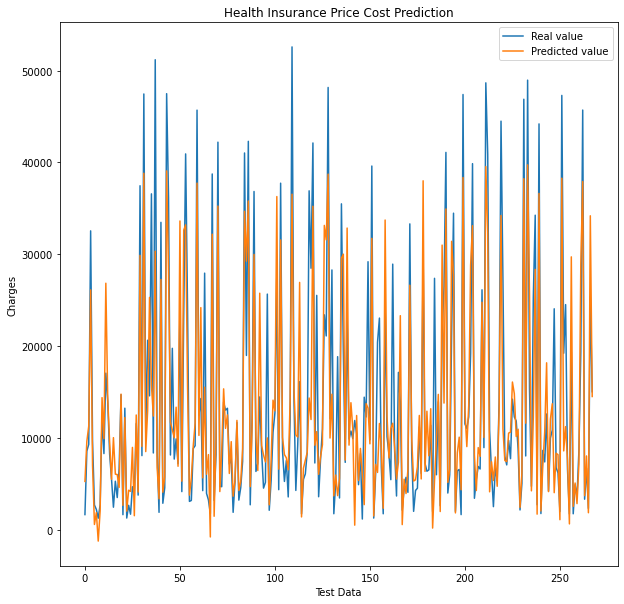

In [33]:
# visualize the predicted value with real value
plt.figure(figsize=(10, 10))

plt.plot(y_test.values, label='Real value')
plt.plot(y_test_pred, label='Predicted value')

plt.title('Health Insurance Price Cost Prediction')
plt.xlabel('Test Data')
plt.ylabel('Charges')
plt.legend()
plt.show()

## V. Prediction using the Model

In [71]:
#Save the Linear Regression model
lr_model=LinearRegression()
lr_model.fit(X_train,y_train)
dump(lr_model, 'lr_insurance.pkl')

['lr_insurance.pkl']

In [72]:
# Load the Model:
load_lr_model = load('lr_insurance.pkl')

> Predict Sample Data

In [73]:
df_.head()

,age,bmi,children,charges,sex_male,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,0,1,0,0,0,1
1,18,33.770,1,1725.55230,1,0,0,0,1,0
2,28,33.000,3,4449.46200,1,0,0,0,1,0
3,33,22.705,0,21984.47061,1,0,0,1,0,0
4,32,28.880,0,3866.85520,1,0,0,1,0,0


In [76]:
sample=[[28, 25.760, 0, 1, 0, 1, 0, 0, 0]]

In [77]:
load_lr_model.predict(sample)

array([3965.45493529])